# Notebook 12 - Autoencoders.

*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1. Clasificando imágenes reales (CIFAR100 - Dataset)  [Ejerc. 2 - Notebook 11]

---

**Tarea:** Entrena y valida un modelo de Redes Neuronales Convolucionales sobre el dataset CIFAR-100 incluido dentro de ***tf.keras.datasets.cifar100***. Una vez tengas tu modelo correctamente entrenado, prueba a visualizar los filtros aprendidos en la primera capa. Recuerda que nunca está de más hacer un análisis exploratorio de los datos para ganar más conocimiento de con qué estamos trabajando.

**Ojo!** Ten presente que ahora estaremos trabajando con imágenes a color, así que la dimensión correspondiente al canal, será de tamaño 3, en referencia a las tres intensidades de color **RGB** (Red, Blue, Green) 

In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.layers     import Dense
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.datasets import cifar100

from sklearn.model_selection import train_test_split


# Cargamos el dataset desde la función.
train_data, test_data = cifar100.load_data("fine") 

X_train, Y_train = train_data
X_test, Y_test   = test_data



# Guardamos las dimensiones de la matriz de entrada.
n = X_train.shape[0]

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = to_categorical(Y_train, 100)
Y_test = to_categorical(Y_test, 100)


print("Dimensiones de datos de entrenamiento:", X_train.shape, " Y:", Y_train.shape)

169009152/169001437 [==============================] - 76s 0us/step
Dimensiones de datos de entrenamiento: (50000, 32, 32, 3)  Y: (50000, 100)


In [0]:
print(X_train[0].max(), X_train[0].min())

1.0 0.003921569


In [0]:
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D, BatchNormalization
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten, Conv2DTranspose, Dropout
from tensorflow.python.keras import optimizers

In [0]:
'''input1 = Input(shape=(32,32,3))

norm = BatchNormalization()(input1)
conv1 = Conv2D(filters=32, kernel_size=4, padding='same', activation='relu')(norm)
pool1 = MaxPooling2D(pool_size=2, padding='valid')(conv1)
conv2 = Conv2D(filters=64, kernel_size=4, padding='same', activation='relu')(pool1)
conv3 = Conv2D(filters=128, kernel_size=8, activation='relu')(conv2)

pool2 = MaxPooling2D(pool_size=2, padding='valid')(conv2)

flatten = Flatten()(pool2)
out = Dense(100, name='out_layer')(flatten)

model = Model(inputs=input1 , outputs=out)'''


In [0]:
'''model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(4,4), padding='same', activation='relu'))
model.add(Dropout(0.4))
model.add(Conv2D(filters=32, kernel_size=(8,8), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='valid'))

model.add(Dropout(0.4))
model.add(Conv2D(filters=64, kernel_size=(8,8), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(16,16), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='valid'))

model.add(Flatten())
model.add(Dense(512, name='other', activation='relu'))
model.add(Dense(100, name='out_layer', activation='softmax'))'''

In [0]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=(5, 5), padding='valid', activation='elu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, name='other', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, name='other2', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, name='out_layer', activation='softmax'))

In [0]:
from keras.regularizers import l2
L2_DECAY_RATE = 0.0005

# https://github.com/geifmany/cifar-vgg/blob/master/cifar100vgg.py

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='elu', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='elu', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='elu', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='elu', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=1024, kernel_size=(5, 5), padding='same', activation='elu', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, name='other', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, name='other2', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, name='out_layer', activation='softmax'))

Using TensorFlow backend.


In [0]:
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

sgd = optimizers.SGD(lr=0.02, decay=1e-6, momentum=0.95, nesterov=True)
adam = optimizers.Adam(lr=0.02)

model.compile(loss='categorical_crossentropy',
                optimizer=sgd,
                metrics=['mse', 'accuracy'])

model.load_weights('./top_weights .h5')

mc = ModelCheckpoint(filepath='./top_weights cis100.h5', monitor='val_acc', save_best_only='True', save_weights_only='True', verbose=1)
es = EarlyStopping(monitor='val_acc', patience=15, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_acc')

callbacks = [mc, es, rlr]

history = model.fit(X_train, Y_train, epochs=40, batch_size=128,
                    validation_data=(X_test, Y_test), verbose=True,
                    callbacks=callbacks)

ValueError: ignored

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  409856    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  3277312   
_________________________________________________________________
batch_normalization (BatchNo multiple                  2048      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 multiple                  0         
__________

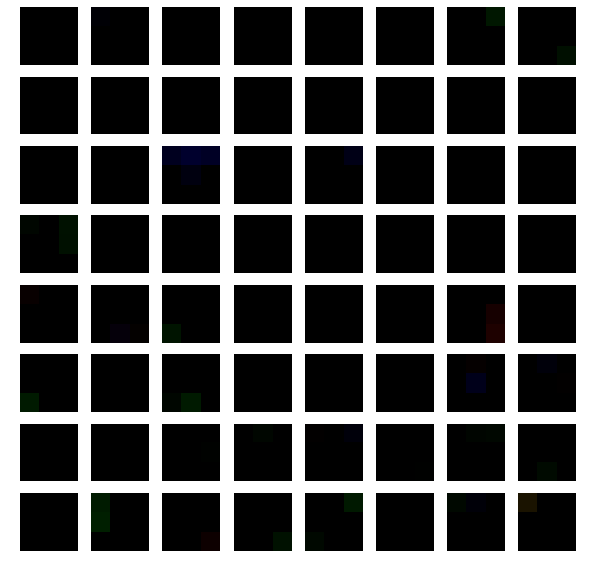

In [0]:
weight = np.array(model.layers[0].get_weights())
filter1 = weight[0][:,:,:,0]

def showFilters(filters):
  
  fig, axes = plt.subplots(8, 8, figsize = (10,10))
  
  for i in range(64):
    axesx = int(i/8)
    axesy = i % 8
    filter1 = filters[:,:,:,i]
    rescale = (filter1 + filter1.min()) / (filter1.max() - filter1.min())
    axes[axesx, axesy].imshow(np.clip(rescale, 0,1))
    axes[axesx, axesy].axis('off')
    
showFilters(weight[0])

In [0]:
plt.matshow(image.reshape(28, 28))

## 2. Autoencoders y espacios latentes con MNIST.

No, si ya me sabe mal volver al maldito dataset MNIST, pero es que... ya conociéndolo podemos aprovechar mucho del código que hemos desarrollado en ejercicios anteriores para trabajar más rápido. En cualquier caso, si lo prefieres, puedes trabajar con otros datasets similares. Por ejemplo, puedes probar a trabajar con el Fashion MNIST (de complementos de moda) o notMNIST (de diferentes tipografías).

Hoy lo que vamos a hacer es implementar nuestro propio ***autoencoder***, y con el, extraer vectores de nuestro espacio latente. Al turrón!

---

**Tarea:** Lo primero en lo que tienes que trabajar es en diseñar un modelo ***autoencoder*** sencillo, que sólamente disponga de una capa oculta para el *encoder* y otra para el *decoder*. Recuerda que deberás crear tu modelo de la misma forma que hemos hecho siempre, pero además crear modelos aparte utilizando las capas del primer modelo construido para poder trabajar con el ***encoder*** y el ***decoder*** de manera independiente.

**Pregunta** : ¿Qué función de activación crees que es mejor elegir para utilizar en la última capa del ***decoder***: *ReLU*, *Sigmoide* o *Softmax*?¿Por qué? Pista : La solución rima con *palanganoide*. 

Una vez tengas tu *autoencoder* construido y funcionando realiza lo siguiente:

1. Haz que tu autoencoder sólo tenga dos neuronas en su cuello de botella y entrena al modelo. Una vez lo tengas, prueba a visualizar una imagen de entrada y el output reconstruido por la red. ¿Es una buena reconstrucción? Si no estás convencido del resultado, comprueba que el autoencoder ha hecho su trabajo, visualizando un *** scatter plot*** donde cada variable latente estará en un eje, y donde cada clase se visualice de un color. Si tu modelo es correcto, deberías de observar cómo números de clases similares estarán en posiciones cercanas formando clusters.

2. Ahora repite el entrenamiento del autoencoder pero utilizando 16 neuronas en su cuello de botella. Ahora sí deberías de ser capaz de obtener una buena reconstrucción de tus imágenes. ¿Podemos intentar observar si la representación en el espacio latente está ordenada? Vamos a generar una interpolación. Prueba a codificar en tu *encoder* dos imágenes diferentes y guarda sus vectores codificados en el espacio latente. Ahora, genera interpolaciones de esos dos vectores (es decir, mézclalos  en diferentes proporciones) y decodifícalos con tu ***decoder***. ¿Observas algún tipo de interpolación?

3. (**Opcional**) Prueba a añadir ruido al *input* (utiliza la función implementada hace un par de ejercicios) y entrena a tu ***autoencoder*** para comprobar si tu modelo es capaz de actuar como un *denoiser*.

In [0]:
# Cargamos el dataset desde el archivo.
mnist = pd.read_csv("./sample_data/mnist_train_small.csv", header=None).as_matrix()

# Guardamos las variables X e Y.
X, Y = mnist[:, 1:], mnist[:, 0:1]

n, p = X.shape

# Normalizamos input y codificamos output con one-hot encoding.
Xt = X / 255.0
Yt = to_categorical(Y, 10)

Xt = Xt.reshape(n, 28, 28, 1)

# Generamos train y test set.
X_train, X_test, Y_train, Y_test = train_test_split(Xt, Yt, train_size=0.7)


##

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
X_train.shape

(14000, 28, 28, 1)

In [0]:
inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(filters=32, kernel_size=5, strides=2, padding='same', activation='relu', name='capa1')(inputs)
conv2 = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu', name='capa2')(conv1)
conv3 = Conv2D(filters=128, kernel_size=3, strides=2, padding='same', activation='relu', name='capa3')(conv2)

flatten = Flatten()(conv3)
code = Dense(2, activation='sigmoid')(flatten)

code2 = Dense(3* 3* 128, activation='sigmoid')(code)

reshape = Reshape((3, 3, 128))(code2)

dconv3 = Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='same', activation='relu', name='dconv3')(reshape)
dconv2 = Conv2DTranspose(filters=32, kernel_size=5, strides=2, padding='same', activation='relu', name='dconv2')(dconv3)
dconv1 = Conv2DTranspose(filters=1, kernel_size=5, strides=2, padding='same', activation='sigmoid', name='dconv1')(dconv2)

model2 = Model(inputs=inputs, outputs=dconv1)

In [0]:
model2.compile(loss='mse',
              optimizer=adam,
              metrics=['mse', 'accuracy'])

model2.fit(X_train, X_train, epochs=100, batch_size=256)

ValueError: ignored